In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:\\Users\\aftermath\\Documents\\CS-101\\JARINGAN SARAF TIRUAN\\tugas1\\4.CNN\\training_set',target_size=(64,64),batch_size=32,class_mode='binary')
testing_set = test_datagen.flow_from_directory('C:\\Users\\aftermath\\Documents\\CS-101\\JARINGAN SARAF TIRUAN\\tugas1\\4.CNN\\testing_set',target_size=(64,64),batch_size=32,class_mode='binary')



Found 389 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


## Max Pool

In [18]:
max = Sequential()
#Convolve-Pool
max.add(Conv2D(filters=32,kernel_size=(3,3), input_shape = (64,64,3), activation = 'relu'))
max.add(MaxPooling2D(pool_size = (2,2)))

#Flatten
max.add(Flatten())
#Fully-connected
max.add(Dense(units=128, activation = 'relu'))
max.add(Dense(units=1, activation = 'sigmoid'))


In [91]:
max.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [92]:
maxhistory = max.fit_generator(training_set,  epochs = 20, validation_data = testing_set, steps_per_epoch=40,validation_steps=10)

Epoch 1/20
40/40 [==============================] - 43s 1s/step - loss: 0.0228 - acc: 0.9922 - val_loss: 0.6243 - val_acc: 0.8798
Epoch 2/20
40/40 [==============================] - 40s 1s/step - loss: 0.0044 - acc: 1.0000 - val_loss: 1.0455 - val_acc: 0.8546
Epoch 3/20
40/40 [==============================] - 41s 1s/step - loss: 0.0112 - acc: 0.9945 - val_loss: 0.8164 - val_acc: 0.8643
Epoch 4/20
40/40 [==============================] - 48s 1s/step - loss: 0.0126 - acc: 0.9977 - val_loss: 0.6263 - val_acc: 0.8855
Epoch 5/20
40/40 [==============================] - 50s 1s/step - loss: 0.0049 - acc: 0.9992 - val_loss: 0.7328 - val_acc: 0.8837
Epoch 6/20
40/40 [==============================] - 44s 1s/step - loss: 0.0078 - acc: 0.9969 - val_loss: 0.5436 - val_acc: 0.8722
Epoch 7/20
40/40 [==============================] - 50s 1s/step - loss: 0.0380 - acc: 0.9834 - val_loss: 0.7251 - val_acc: 0.8643
Epoch 8/20
40/40 [==============================] - 46s 1s/step - loss: 0.0138 - acc: 0.99

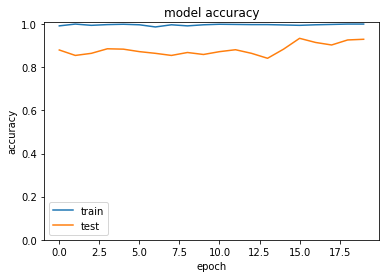

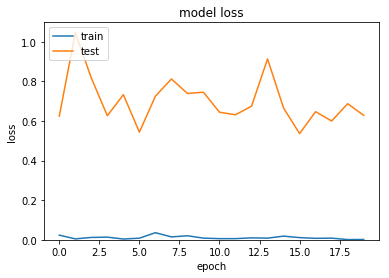

In [94]:
# summarize history for accuracy
plt.plot(maxhistory.history['acc'])
plt.plot(maxhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.ylim(ymin=0)
plt.show()
# summarize history for loss
plt.plot(maxhistory.history['loss'])
plt.plot(maxhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymin=0)
plt.show()

In [22]:
max1 = Sequential()
#Convolve-Pool
max1.add(Conv2D(filters=32,kernel_size=(3,3), input_shape = (64,64,3), activation = 'relu'))
max1.add(MaxPooling2D(pool_size = (2,2)))

max1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
max1.add(MaxPooling2D(pool_size=(2,2)))
max1.add(Dropout(0.25))

#Flatten
max1.add(Flatten())
#Fully-connected
max1.add(Dense(units=128, activation = 'relu'))
max1.add(Dense(units=1, activation = 'sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
max1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
max1history = max1.fit_generator(training_set,  epochs = 20, validation_data = testing_set, steps_per_epoch=40,validation_steps=10)

Epoch 1/20
40/40 [==============================] - 45s 1s/step - loss: 0.5641 - acc: 0.7406 - val_loss: 0.4274 - val_acc: 0.8194
Epoch 2/20
40/40 [==============================] - 40s 1s/step - loss: 0.3559 - acc: 0.8597 - val_loss: 0.4774 - val_acc: 0.8062
Epoch 3/20
40/40 [==============================] - 42s 1s/step - loss: 0.3052 - acc: 0.8802 - val_loss: 0.3996 - val_acc: 0.8502
Epoch 4/20
40/40 [==============================] - 48s 1s/step - loss: 0.2074 - acc: 0.9225 - val_loss: 0.4171 - val_acc: 0.8915
Epoch 5/20
40/40 [==============================] - 48s 1s/step - loss: 0.1739 - acc: 0.9270 - val_loss: 0.5674 - val_acc: 0.8502
Epoch 6/20
40/40 [==============================] - 44s 1s/step - loss: 0.1959 - acc: 0.9141 - val_loss: 0.3459 - val_acc: 0.9147
Epoch 7/20
40/40 [==============================] - 41s 1s/step - loss: 0.1314 - acc: 0.9505 - val_loss: 0.3474 - val_acc: 0.8987
Epoch 8/20
40/40 [==============================] - 43s 1s/step - loss: 0.1130 - acc: 0.95

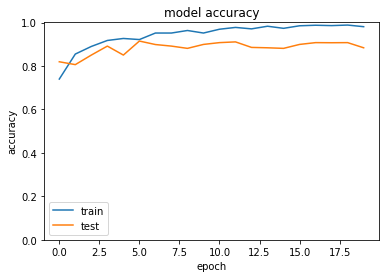

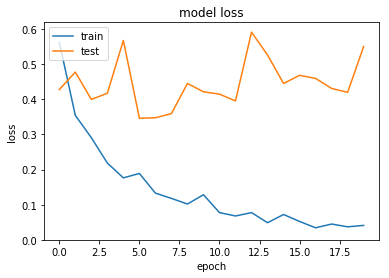

In [75]:
# summarize history for accuracy
plt.plot(max1history.history['acc'])
plt.plot(max1history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.ylim(ymin=0)
plt.show()
# summarize history for loss
plt.plot(max1history.history['loss'])
plt.plot(max1history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymin=0)
plt.show()

## Average Pool

In [26]:
avg = Sequential()
#Convolve-Pool
avg.add(Conv2D(32,(3,3), input_shape = (64,64,3), activation = 'relu'))
avg.add(AveragePooling2D(pool_size=(2, 2)))

#Flatten
avg.add(Flatten())
#Fully-connected
avg.add(Dense(units=128, activation = 'relu'))
avg.add(Dense(units=1, activation = 'sigmoid'))

In [27]:
avg.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
avghistory = avg.fit_generator(training_set,  epochs = 20, validation_data = testing_set, steps_per_epoch=40,validation_steps=10)

Epoch 1/20
40/40 [==============================] - 46s 1s/step - loss: 0.8482 - acc: 0.6324 - val_loss: 0.5036 - val_acc: 0.7791
Epoch 2/20
40/40 [==============================] - 42s 1s/step - loss: 0.4343 - acc: 0.8145 - val_loss: 0.4169 - val_acc: 0.7974
Epoch 3/20
40/40 [==============================] - 40s 996ms/step - loss: 0.3646 - acc: 0.8480 - val_loss: 0.3879 - val_acc: 0.7946
Epoch 4/20
40/40 [==============================] - 42s 1s/step - loss: 0.2819 - acc: 0.8967 - val_loss: 0.3322 - val_acc: 0.8590
Epoch 5/20
40/40 [==============================] - 39s 985ms/step - loss: 0.2360 - acc: 0.9139 - val_loss: 0.3360 - val_acc: 0.8760
Epoch 6/20
40/40 [==============================] - 40s 999ms/step - loss: 0.1929 - acc: 0.9231 - val_loss: 0.3021 - val_acc: 0.8678
Epoch 7/20
40/40 [==============================] - 46s 1s/step - loss: 0.1876 - acc: 0.9215 - val_loss: 0.2908 - val_acc: 0.8837
Epoch 8/20
40/40 [==============================] - 40s 1s/step - loss: 0.1733 - 

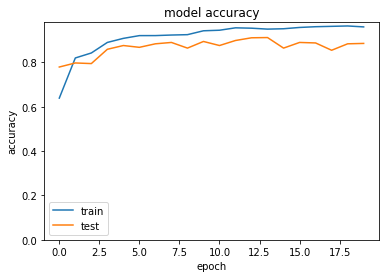

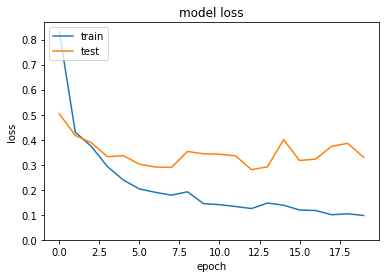

In [76]:
# summarize history for accuracy
plt.plot(avghistory.history['acc'])
plt.plot(avghistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.ylim(ymin=0)
plt.show()
# summarize history for loss
plt.plot(avghistory.history['loss'])
plt.plot(avghistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymin=0)
plt.show()

In [30]:
avg1 = Sequential()
#Convolve-Pool
avg1.add(Conv2D(32,(3,3), input_shape = (64,64,3), activation = 'relu'))
avg1.add(AveragePooling2D(pool_size=(2, 2)))

avg1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
avg1.add(AveragePooling2D(pool_size=(2,2)))
avg1.add(Dropout(0.25))

#Flatten
avg1.add(Flatten())
#Fully-connected
avg1.add(Dense(units=128, activation = 'relu'))
avg1.add(Dense(units=1, activation = 'sigmoid'))

In [31]:
avg1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
avg1history = avg1.fit_generator(training_set,  epochs = 20, validation_data = testing_set, steps_per_epoch=40,validation_steps=10)

Epoch 1/20
40/40 [==============================] - 47s 1s/step - loss: 0.5911 - acc: 0.7022 - val_loss: 0.4935 - val_acc: 0.7797
Epoch 2/20
40/40 [==============================] - 42s 1s/step - loss: 0.3443 - acc: 0.8652 - val_loss: 0.3331 - val_acc: 0.9070
Epoch 3/20
40/40 [==============================] - 45s 1s/step - loss: 0.2739 - acc: 0.8957 - val_loss: 0.3481 - val_acc: 0.8855
Epoch 4/20
40/40 [==============================] - 44s 1s/step - loss: 0.2852 - acc: 0.9020 - val_loss: 0.3916 - val_acc: 0.8527
Epoch 5/20
40/40 [==============================] - 45s 1s/step - loss: 0.2214 - acc: 0.9075 - val_loss: 0.3329 - val_acc: 0.8855
Epoch 6/20
40/40 [==============================] - 42s 1s/step - loss: 0.2042 - acc: 0.9174 - val_loss: 0.3188 - val_acc: 0.8915
Epoch 7/20
40/40 [==============================] - 42s 1s/step - loss: 0.1652 - acc: 0.9323 - val_loss: 0.2967 - val_acc: 0.8899
Epoch 8/20
40/40 [==============================] - 42s 1s/step - loss: 0.1406 - acc: 0.94

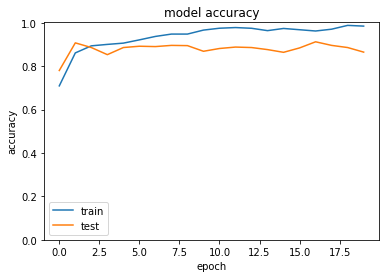

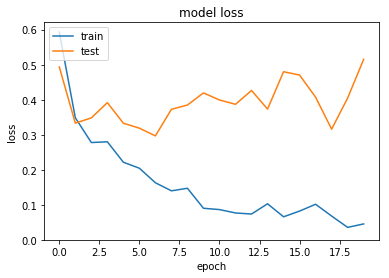

In [77]:
# summarize history for accuracy
plt.plot(avg1history.history['acc'])
plt.plot(avg1history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.ylim(ymin=0)
plt.show()
# summarize history for loss
plt.plot(avg1history.history['loss'])
plt.plot(avg1history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymin=0)
plt.show()

## Min0 Pool

In [62]:
#def median_output_shape(input_shape):
#    shape = list(input_shape)
#    shape[1] *= 2
#    shape[2] /= 2
#    shape[3] /= 2
#    return tuple(shape)

In [66]:
#def median_pool2d(x):
#    median = tf.contrib.distributions.percentile(x, 50.0)
#    print(x)
#    return median

In [10]:
def min0_pool2d(x):
   
    min_x = -K.pool2d(-x, pool_size=(2, 2), strides=(2, 2))
    return min_x

def min0_pool2d_output_shape(input_shape):
    shape = list(input_shape)
    shape[1] *= 2
    return tuple(shape)

In [12]:
minzero = Sequential()

#Convolve-Pool
minzero.add(Conv2D(filters=32,kernel_size=(3,3), input_shape = (64,64,3), activation = 'relu'))
minzero.add(Lambda(min0_pool2d, output_shape=min0_pool2d_output_shape))

#Flatten
minzero.add(Flatten())
#Fully-connected
minzero.add(Dense(units=128, activation = 'relu'))
minzero.add(Dense(units=1, activation = 'sigmoid'))

In [13]:
minzero.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
minzerohistory = minzero.fit_generator(training_set,  epochs = 20, validation_data = testing_set, steps_per_epoch=40,validation_steps=10)

Epoch 1/20


InvalidArgumentError: Matrix size-incompatible: In[0]: [32,30752], In[1]: [246016,128]
	 [[{{node dense_3/MatMul}}]]
	 [[{{node loss_1/mul}}]]

## Min Pool

In [4]:
from keras import backend as K
from keras.layers import Lambda

In [5]:
def min_pool2d(x):

    max_val = K.max(x) + 1 # we gonna replace all zeros with that value
    # replace all 0s with very high numbers
    is_zero = max_val * K.cast(K.equal(x,0), dtype=K.floatx())
    x = is_zero + x

    # execute pooling with 0s being replaced by a high number
    min_x = -K.pool2d(-x, pool_size=(2, 2), strides=(2, 2))

    # depending on the value we either substract the zero replacement or not
    is_result_zero = max_val * K.cast(K.equal(min_x, max_val), dtype=K.floatx()) 
    min_x = min_x - is_result_zero

    return min_x # concatenate on channel


In [36]:
min = Sequential()
#Convolve-Pool
min.add(Conv2D(filters=32,kernel_size=(3,3), input_shape = (64,64,3), activation = 'relu'))
min.add(Lambda(min_pool2d))

#Flatten
min.add(Flatten())
#Fully-connected
min.add(Dense(units=128, activation = 'relu'))
min.add(Dense(units=1, activation = 'sigmoid'))


In [79]:
min.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [80]:
minhistory = min.fit_generator(training_set,  epochs = 20, validation_data = testing_set, steps_per_epoch=40,validation_steps=10)

Epoch 1/20
40/40 [==============================] - 47s 1s/step - loss: 0.0718 - acc: 0.9781 - val_loss: 0.4169 - val_acc: 0.8987
Epoch 2/20
40/40 [==============================] - 65s 2s/step - loss: 0.0532 - acc: 0.9851 - val_loss: 0.5323 - val_acc: 0.8798
Epoch 3/20
40/40 [==============================] - 52s 1s/step - loss: 0.0541 - acc: 0.9812 - val_loss: 0.4508 - val_acc: 0.9031
Epoch 4/20
40/40 [==============================] - 48s 1s/step - loss: 0.0778 - acc: 0.9677 - val_loss: 0.5859 - val_acc: 0.8566
Epoch 5/20
40/40 [==============================] - 48s 1s/step - loss: 0.0389 - acc: 0.9890 - val_loss: 0.4434 - val_acc: 0.8987
Epoch 6/20
40/40 [==============================] - 46s 1s/step - loss: 0.0174 - acc: 0.9953 - val_loss: 0.4928 - val_acc: 0.8876
Epoch 7/20
40/40 [==============================] - 47s 1s/step - loss: 0.0181 - acc: 0.9977 - val_loss: 0.5002 - val_acc: 0.8899
Epoch 8/20
40/40 [==============================] - 49s 1s/step - loss: 0.0300 - acc: 0.99

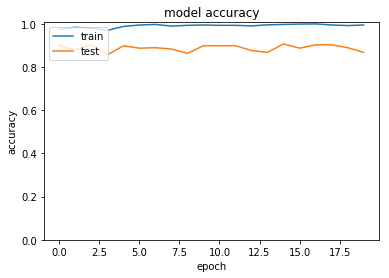

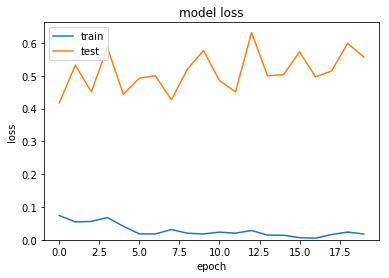

In [83]:
# summarize history for accuracy
plt.plot(minhistory.history['acc'])
plt.plot(minhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymin=0)
plt.show()
# summarize history for loss
plt.plot(minhistory.history['loss'])
plt.plot(minhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymin=0)
plt.show()

In [6]:
min1 = Sequential()
#Convolve-Pool
min1.add(Conv2D(filters=32,kernel_size=(3,3), input_shape = (64,64,3), activation = 'relu'))
min1.add(Lambda(min_pool2d))

#Flatten
min1.add(Flatten())
#Fully-connected
min1.add(Dense(units=128, activation = 'relu'))
min1.add(Dense(units=1, activation = 'sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
min1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
min1history = min1.fit_generator(training_set,  epochs = 20, validation_data = testing_set, steps_per_epoch=40,validation_steps=10)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/20


C:\Users\aftermath\Anaconda3\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


40/40 [==============================] - 48s 1s/step - loss: 0.5742 - acc: 0.7599 - val_loss: 0.3783 - val_acc: 0.8333
Epoch 2/20
40/40 [==============================] - 43s 1s/step - loss: 0.2923 - acc: 0.8832 - val_loss: 0.3567 - val_acc: 0.8502
Epoch 3/20
40/40 [==============================] - 46s 1s/step - loss: 0.2260 - acc: 0.9217 - val_loss: 0.2755 - val_acc: 0.9186
Epoch 4/20
40/40 [==============================] - 48s 1s/step - loss: 0.1849 - acc: 0.9325 - val_loss: 0.3608 - val_acc: 0.8634
Epoch 5/20
40/40 [==============================] - 45s 1s/step - loss: 0.1691 - acc: 0.9302 - val_loss: 0.3520 - val_acc: 0.8643
Epoch 6/20
40/40 [==============================] - 46s 1s/step - loss: 0.1590 - acc: 0.9333 - val_loss: 0.4548 - val_acc: 0.8018
Epoch 7/20
40/40 [==============================] - 48s 1s/step - loss: 0.1730 - acc: 0.9288 - val_loss: 0.3402 - val_acc: 0.8643
Epoch 8/20
40/40 [==============================] - 45s 1s/step - loss: 0.1119 - acc: 0.9624 - val_lo

C:\Users\aftermath\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


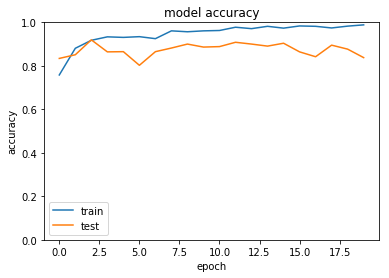

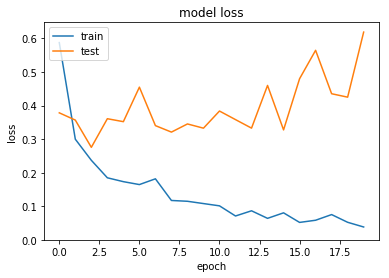

In [9]:
# summarize history for accuracy
plt.plot(min1history.history['acc'])
plt.plot(min1history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.ylim(ymin=0)
plt.show()
# summarize history for loss
plt.plot(min1history.history['loss'])
plt.plot(min1history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymin=0)
plt.show()